### Project COEUR

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Charge le dataset coeur

In [16]:
# Charge le dataset.
data = pd.read_excel("dataset/coeur.xlsx")

In [17]:
# Copie data dans df.
df = data.copy()

In [18]:
# Affiche les informations relatives à df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
# Affiche les prémières lignes de df.
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


### Vérifie les doublons

In [20]:
# Compte le nombre de lignes dupliquées (ici il n'y en a pas).
df.duplicated().sum()

0

### Vérifie les données manquantes

In [21]:
# Compte le nombre de données manquantes par colonne (ici il n'y en a pas).
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

### Vérifie les constantes

In [22]:
# Ici il n'y a pas de constantes, car chaque variable prend au moins deux valeurs différentes.
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

### Standardise les variables quantitatives

In [23]:
# Standardise les colonnes de type number.
for column in df.drop("CŒUR", axis=1).select_dtypes(np.number).columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

In [24]:
# Vérifie le résultat.
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,-1.432359,homme,AA,0.410685,0.824621,-0.551041,Normal,1.382175,Non,-0.831979,Ascendant,0
1,-0.478223,femme,DNA,1.490940,-0.171867,-0.551041,Normal,0.753746,Non,0.105606,Plat,1
2,-1.750404,homme,AA,-0.129442,0.769768,-0.551041,ST,-1.524307,Non,-0.831979,Ascendant,0
3,-0.584238,femme,ASY,0.302660,0.138964,-0.551041,Normal,-1.131539,Oui,0.574398,Plat,1
4,0.051853,homme,DNA,0.950812,-0.034736,-0.551041,Normal,-0.581664,Non,-0.831979,Ascendant,0


### Encode les variables qualitatives

In [25]:
# Encode les variables qualitatives.
for column in df.drop("CŒUR", axis=1).select_dtypes("object").columns:
        df[column] = df[column].astype("category").cat.codes

In [26]:
# Vérifie le résultat.
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,-1.432359,1,0,0.410685,0.824621,-0.551041,1,1.382175,0,-0.831979,0,0
1,-0.478223,0,3,1.490940,-0.171867,-0.551041,1,0.753746,0,0.105606,2,1
2,-1.750404,1,0,-0.129442,0.769768,-0.551041,2,-1.524307,0,-0.831979,0,0
3,-0.584238,0,1,0.302660,0.138964,-0.551041,1,-1.131539,1,0.574398,2,1
4,0.051853,1,3,0.950812,-0.034736,-0.551041,1,-0.581664,0,-0.831979,0,0


### Fonction prediction

In [27]:
def prediction(dataset):
    # Features et Target
    x = dataset.drop("CŒUR", axis=1)
    y = dataset["CŒUR"]

    # Répartis le dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    k_features = []
    lr_train_list = []
    lr_test_list = []
    tree_train_list = []
    tree_test_list = []

    for feature in range(1, x.shape[1] + 1):
        # Features selection
        select_k_best = SelectKBest(f_classif, k=feature)
        x_train_new = select_k_best.fit_transform(x_train, y_train)
        x_test_new = select_k_best.transform(x_test)

        # Logistic Regression
        logistic_regression = LogisticRegression(random_state=0)
        logistic_regression.fit(x_train_new, y_train)
        # Train score
        lr_train_score = logistic_regression.score(x_train_new, y_train)
        # Test score
        lr_test_score = logistic_regression.score(x_test_new, y_test)

        # Decision Tree
        decision_tree = DecisionTreeClassifier(random_state=0)
        decision_tree.fit(x_train_new, y_train)
        # Train score
        tree_train_score = decision_tree.score(x_train_new, y_train)
        # Test score
        tree_test_score = decision_tree.score(x_test_new, y_test)

        # List
        k_features.append(feature)
        lr_train_list.append(lr_train_score)
        lr_test_list.append(lr_test_score)
        tree_train_list.append(tree_train_score)
        tree_test_list.append(tree_test_score)

    # Table Numpy
    k_features = np.array(k_features)
    lr_train_list = np.array(lr_train_list)
    lr_test_list = np.array(lr_test_list)
    tree_train_list = np.array(tree_train_list)
    tree_test_list = np.array(tree_test_list)

    # Graph
    plt.figure(figsize=(10, 8))

    plt.title("Graph")

    plt.plot(k_features, lr_train_list, label="lr train score")
    plt.plot(k_features, lr_test_list, label="lr test score")
    plt.plot(k_features, tree_train_list, label="tree train score")
    plt.plot(k_features, tree_test_list, label="tree test score")

    plt.xlabel("Features")
    plt.ylabel("Score")

    plt.legend()
    return plt.show()


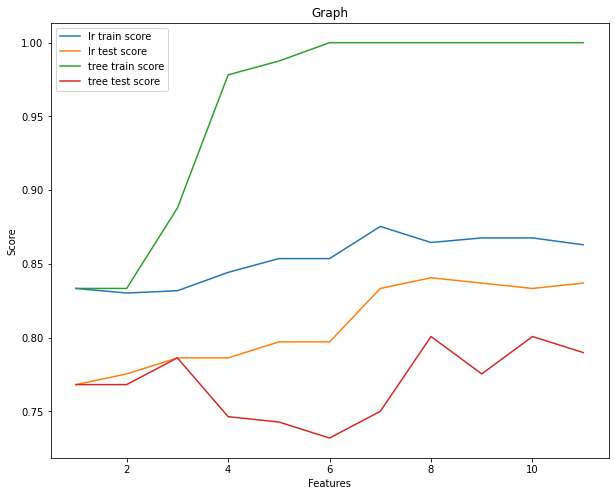

In [28]:
prediction(df)

In [29]:
# Interprétation
# - Le modèle decision_tree est en sur-apprentissage.
# - Le modèle logistic_regression réalise sa meilleure performance (environ 84%) avec la selection de 8 Features.